### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

**Ans** - 
    
    C. sample averages are different
    D. one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05
   **Explanation**: 
    P - value is 0.04 which is less than 0.05, so we can reject null hypothesis (that both samples are coming from same distribution) . This shows that its highly unlikely that it has occurred by chance. 

### Question 2. What is true regarding normal and log-normal distributions:
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

**Ans**
    
    A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions
    C) Logarithm of the normally distributed quantity follow a log-normal distribution
    D) Logarithm of the log-normally distributed quantity follows a normal distribution
   **Explanation:**
   - A lognormal distribution is a continuous probability distribution of a random variable in which logarithm is normally distributed. Thus, if the random variable has a lognormal distribution, then has a normal distribution. Likewise, if has a normal distribution, then has a lognormal distribution. That is why C and D options are correct.
   - The mean being greater than the median is for lognormal distribution shows the higher probability for outliers.
   

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

**Ans.**

B) Unsupervised learning

1. Given that the task is to find groups of traffic patterns or clusters in the satellite images, the best modeling approach would be clustering analysis. Clustering algorithms are categorized into unsupervised learning branch of machine learning and we do not require labelled dataset for training a model. For this problem, we would use pixel information from satellite images and cluster pixels together to identify groups of typical scenarios with slight deviations.
2. If we have evidence in terms of labelled information about these typical scenarios that we are looking for, then it becomes a **semi-supervised** learning problem.

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

**Ans** - 

    1. Training set is used by definition for training our model.
    2. Test set (test samples) is generally reserved for final reporting of model performance. It is never to be used for assessing the model performance while we are training the model as it might lead to overfitting and the model will not generalize well on real world (unseen) data. This is the sample of data is used to provide an unbiased evaluation of a final model fit on the training dataset.
    3. For this reason, we use validation samples during model training process to assess if the model performance is improving during training phase. This sample of data is used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
    4. After we have reached our best performance, we treat test samples as previously unseen data and report model accuracy on this set.

Cases for requiring all 3 sets with validation samples:

    1.  If there are several hyperparameters to tune in the model algorithm we have chosen, then we require larger validation samples, but if model has few or no hyper parameters then we could simply use test samples for reporting model performance without needing a validation set.
    2. If the use case for which we are training a model is such that every single false positive or true negative can have a huge impact - like falsely predicting cancer or not being able to identify a huge financial fraud - it is imperative that we have a validation sample set to ensure no overfitting.

In [1]:
#for sjoin we need the latest version of geopandas, instead of 0.9.0 or older
!pip install --upgrade geopandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis (80 pts)

In this part, you'll use New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

Data dictionary: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf

### read data

In [3]:
data = pd.read_csv('/home/jovyan/shared/Data/NYPD_data.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118.0,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113.0,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578.0,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126.0,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101.0,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [4]:
data.shape

(653075, 35)

In [5]:
data.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'BURGLARY', 'DANGEROUS DRUGS', 'PETIT LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE', 'SEX CRIMES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LA

In [6]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary link is provided above. The focus of this notebook would be on columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks (12 pts, 3 pts each part)
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [7]:
#only keeping the required columns out of big dataframe
data = data[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude']]

In [8]:
# code here 
# make sure to convert date column to datetime
print("After selecting the required columns: "+ str(data.shape))
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], format="%m/%d/%Y", errors='coerce')
data = data[~data['CMPLNT_FR_DT'].isna()]
print("After the removal of missing/wrong dates: "+ str(data.shape))
data = data[~data['CMPLNT_FR_TM'].isna()]
print("After the removal of missing/wrong time: "+ str(data.shape))
data = data[~data['BORO_NM'].isna()]
print("After the removal of missing Boroughs: "+ str(data.shape))
data = data.drop_duplicates(['CMPLNT_NUM'])
print("After the removal of duplicate complaints: "+ str(data.shape))

After selecting the required columns: (653075, 8)
After the removal of missing/wrong dates: (653041, 8)
After the removal of missing/wrong time: (653041, 8)
After the removal of missing Boroughs: (652052, 8)
After the removal of duplicate complaints: (651981, 8)


### 2. Remove rows where location is parks or greenspace and keep data for 2019 and after

In [9]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
data = data[data['PARKS_NM'].isna()]
print("Removed rows where location is parks or greenspace: "+ str(data.shape))

Removed rows where location is parks or greenspace: (646839, 8)


In [10]:
## check the timeline of data
data['CMPLNT_FR_DT'].dt.year.sort_values().unique()

array([1911, 1912, 1913, 1914, 1916, 1918, 1919, 1920, 1942, 1949, 1960,
       1965, 1969, 1970, 1971, 1972, 1974, 1975, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [11]:
# remove data <2019
data = data[data['CMPLNT_FR_DT'].dt.year >= 2019]
print("kept the data with year 2019 and after: "+ str(data.shape))

kept the data with year 2019 and after: (446834, 8)


### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [12]:
# code here
list_of_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
data = data[data['OFNS_DESC'].isin(list_of_crimes)]
print("Kept the data for Type 1 Crimes only: "+ str(data.shape))

Kept the data for Type 1 Crimes only: (91527, 8)


In [13]:
#Crimes types with number of occurrences
data.OFNS_DESC.value_counts()

GRAND LARCENY                     40437
FELONY ASSAULT                    20248
ROBBERY                           12913
BURGLARY                          10609
GRAND LARCENY OF MOTOR VEHICLE     5347
RAPE                               1297
ARSON                               676
Name: OFNS_DESC, dtype: int64

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [14]:
## zip codes map
# zips = gpd.read_file('Data/ZIPCODE/ZIP_CODE_040114.shp')
zips = gpd.read_file('/home/jovyan/shared/Data/ZIP_CODE/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [15]:
zips = zips.to_crs(4326)
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [16]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<AxesSubplot:>

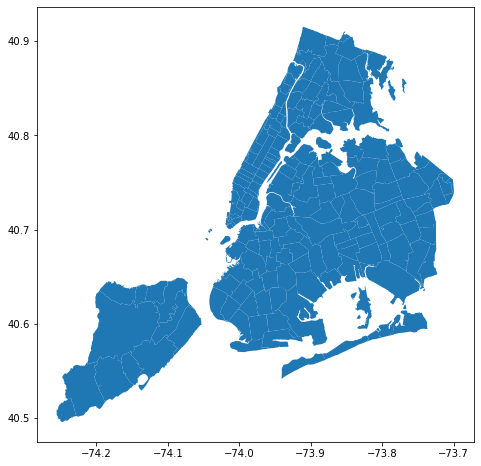

In [17]:
zips.plot(figsize=(8,8))

In [18]:
# creating a geometry column 
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs="epsg:4326")

<AxesSubplot:>

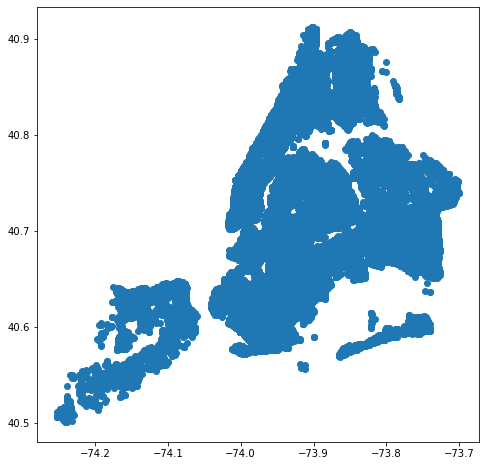

In [19]:
gdf.plot(figsize=(8,8))

In [20]:
# remove rows with location outside NYC
#spatial join to discard the points outside NYC 
#some points were calculated twice in different boroughs, so dropped the duplicates
gdf = gdf.sjoin(zips, how='inner')
gdf = gdf.drop_duplicates('CMPLNT_NUM')

print("Data frame after making the spatial Join: "+ str (gdf.shape))

Data frame after making the spatial Join: (91510, 22)


## Section 2 -Exploratory analysis tasks (50 pts, 10 pts each part)

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough

### 1. time series plotting

In [21]:
# group total crimes by daily numbers
daily_viz = gdf[['CMPLNT_NUM','CMPLNT_FR_DT']].groupby(by=['CMPLNT_FR_DT']).nunique().reset_index()

Text(0.5, 0, 'Date')

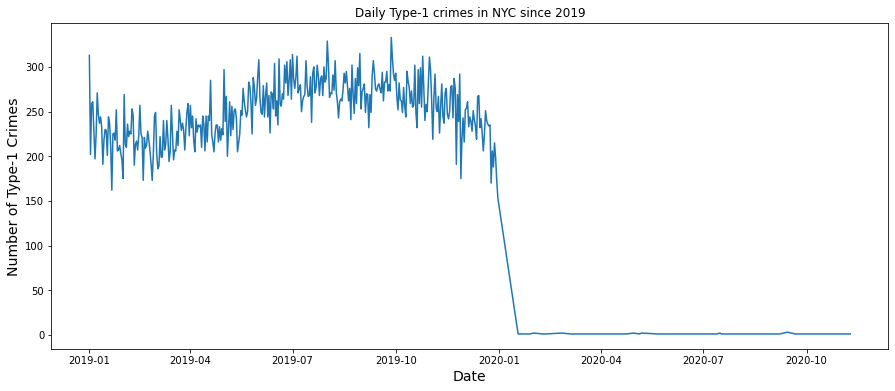

In [22]:
# plot as a time series
plt.figure(figsize=(15,6))
plt.plot(daily_viz.CMPLNT_FR_DT,daily_viz.CMPLNT_NUM)
plt.title("Daily Type-1 crimes in NYC since 2019")
plt.ylabel('Number of Type-1 Crimes', fontsize=14)
plt.xlabel('Date', fontsize=14)

### 2. plotting on borough and zip code level normalized by population

In [23]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
boro_viz = gdf[['CMPLNT_NUM','BORO_NM']].groupby(by=['BORO_NM']).nunique().reset_index()
zip_boro_pop_df = gdf[['BORO_NM','ZIPCODE','POPULATION']].drop_duplicates('ZIPCODE')
boro_pop_df = zip_boro_pop_df.groupby(['BORO_NM'])['POPULATION'].sum().reset_index()
boro_viz = pd.merge(boro_viz, boro_pop_df, on=['BORO_NM'])
boro_viz['POPULATION_in_100k'] = boro_viz['POPULATION']/100000
boro_viz['norm_crime_num'] = boro_viz['CMPLNT_NUM']/boro_viz['POPULATION_in_100k']

In [24]:
boro_viz

,BORO_NM,CMPLNT_NUM,POPULATION,POPULATION_in_100k,norm_crime_num
0,BRONX,18917,1422425.0,14.22425,1329.911946
1,BROOKLYN,26278,2504700.0,25.04700,1049.147603
2,MANHATTAN,25863,1575323.0,15.75323,1641.758547
3,QUEENS,18143,2199926.0,21.99926,824.709558
4,STATEN ISLAND,2309,468220.0,4.68220,493.144248


Text(0.5, 0, 'Borough Names')

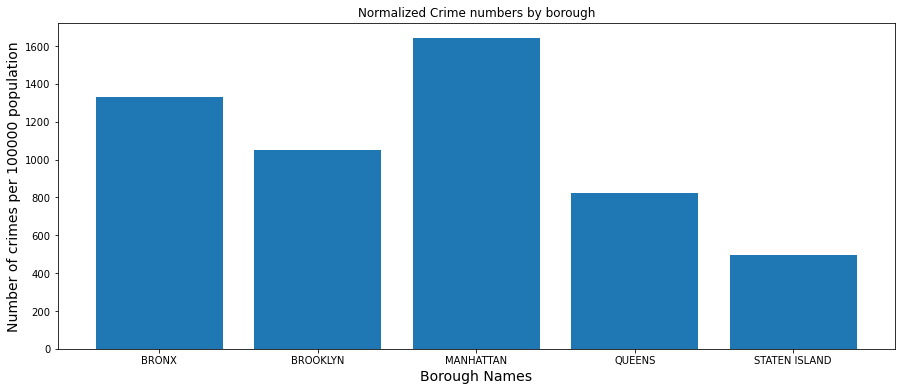

In [25]:
# plot as a bar plot
plt.figure(figsize=(15,6))
plt.bar(boro_viz.BORO_NM,boro_viz.norm_crime_num)
plt.title("Normalized Crime numbers by borough")
plt.ylabel('Number of crimes per 100000 population', fontsize=14)
plt.xlabel('Borough Names', fontsize=14)

In [26]:
# now group by zip codes, normalize by their population
zip_viz = gdf[['CMPLNT_NUM','ZIPCODE']].groupby(by=['ZIPCODE']).nunique().reset_index()
zip_viz = pd.merge(zip_viz, zip_boro_pop_df[['ZIPCODE','POPULATION']], on=['ZIPCODE'])
zip_viz['POPULATION_in_100k'] = zip_viz['POPULATION']/100000
zip_viz['norm_crime_num'] = zip_viz['CMPLNT_NUM']/zip_viz['POPULATION_in_100k']
zip_viz_plot = pd.merge(zips[['ZIPCODE','geometry']],zip_viz, on=['ZIPCODE'])
zip_viz_plot.head()

,ZIPCODE,geometry,CMPLNT_NUM,POPULATION,POPULATION_in_100k,norm_crime_num
0,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",160,18681.0,0.18681,856.485199
1,11213,"POLYGON ((-73.93740 40.67973, -73.93487 40.679...",796,62426.0,0.62426,1275.109730
2,11212,"POLYGON ((-73.90294 40.67084, -73.90223 40.668...",1233,83866.0,0.83866,1470.202466
3,11225,"POLYGON ((-73.95797 40.67066, -73.95576 40.670...",556,56527.0,0.56527,983.600757
4,11218,"POLYGON ((-73.97208 40.65060, -73.97192 40.650...",336,72280.0,0.72280,464.858882


<AxesSubplot:>

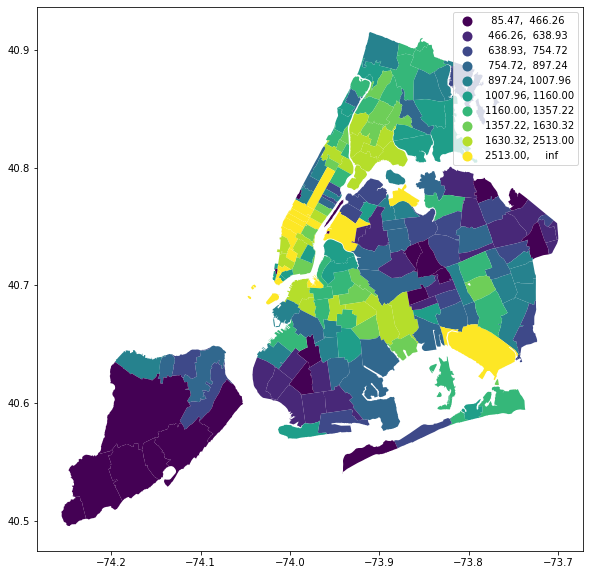

In [27]:
# plot as a heatmap with quantiles color scheme
zip_viz_plot.plot(figsize = (10,10), column='norm_crime_num', scheme='Quantiles', k=10, legend=True)

### 3. bar plot of total crimes vs a) months b) day of week and c) hour of day

In [28]:
gdf['hour_of_day'] = pd.to_datetime(gdf.CMPLNT_FR_TM, errors='coerce').dt.hour
gdf['month'] = gdf.CMPLNT_FR_DT.dt.month

gdf['day_of_week'] = gdf.CMPLNT_FR_DT.dt.dayofweek
name_of_days = {0: 'Monday',1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
# gdf["day_of_week"] = gdf["day_of_week"].apply(lambda x: name_of_days.get(x))

Text(0.5, 0, 'Months')

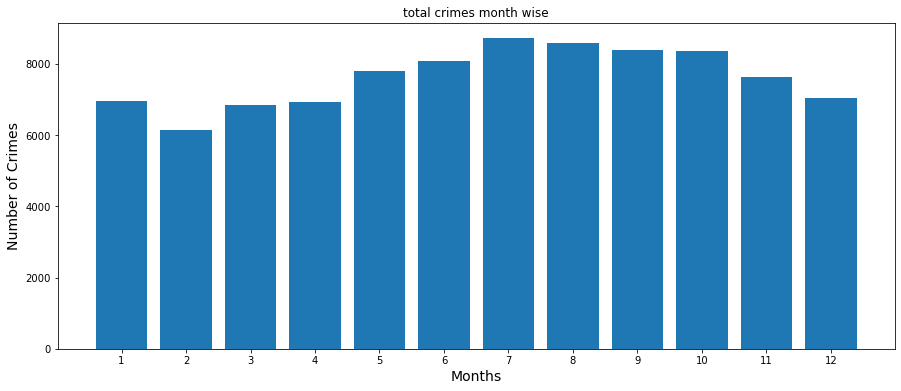

In [29]:
# code here
month_viz = gdf[['CMPLNT_NUM','month']].groupby(by=['month']).nunique().reset_index()
# plot as a bar plot
plt.figure(figsize=(15,6))
plt.bar(month_viz.month,month_viz.CMPLNT_NUM)
plt.xticks(month_viz.month)
plt.title("total crimes month wise")
plt.ylabel('Number of Crimes', fontsize=14)
plt.xlabel('Months', fontsize=14)

Text(0.5, 0, 'Hour of the day')

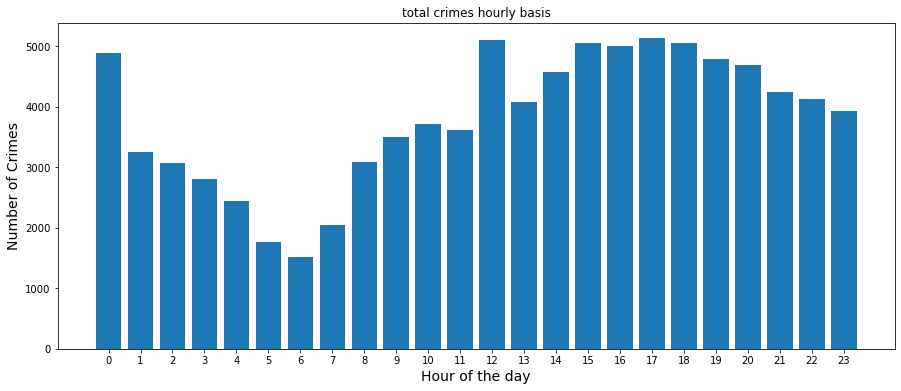

In [30]:
# code here
hour_viz = gdf[['CMPLNT_NUM','hour_of_day']].groupby(by=['hour_of_day']).nunique().reset_index()
# plot as a bar plot
plt.figure(figsize=(15,6))
plt.bar(hour_viz.hour_of_day,hour_viz.CMPLNT_NUM)
plt.xticks(hour_viz.hour_of_day)
plt.title("total crimes hourly basis")
plt.ylabel('Number of Crimes', fontsize=14)
plt.xlabel('Hour of the day', fontsize=14)

Text(0.5, 0, 'day of the week')

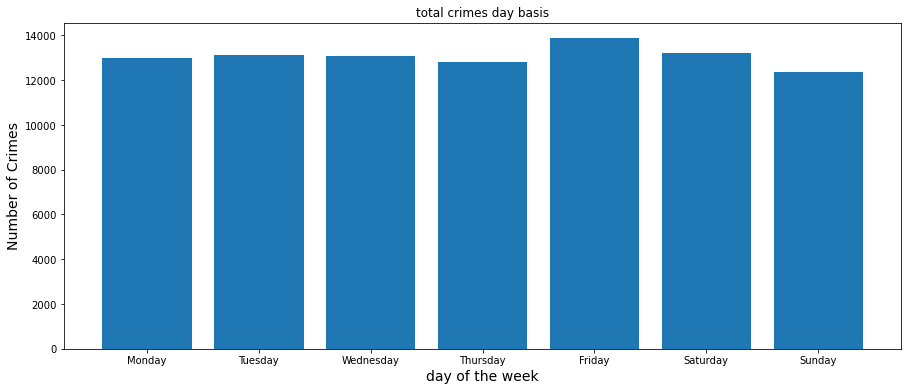

In [31]:
# code here
weekly_viz = gdf[['CMPLNT_NUM','day_of_week']].groupby(by=['day_of_week']).nunique().reset_index()
# plot as a bar plot
plt.figure(figsize=(15,6))
plt.bar(weekly_viz.day_of_week,weekly_viz.CMPLNT_NUM)
plt.xticks(ticks=weekly_viz.day_of_week,labels=list(name_of_days.values()))
plt.title("total crimes day basis")
plt.ylabel('Number of Crimes', fontsize=14)
plt.xlabel('day of the week', fontsize=14)

### 4. Felony assault vs grand larceny by a) day of week b) hour of day

In [32]:
# filter data for above crime types
twotypes_crime= gdf[(gdf['OFNS_DESC']=='GRAND LARCENY') | (gdf['OFNS_DESC']=='FELONY ASSAULT')]
twotypes_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,index_right,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,hour_of_day,month,day_of_week
227,259948697,2019-10-12,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.722027,-73.983446,POINT (-73.98345 40.72203),94,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,0,10,5
1116,533911393,2019-11-19,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.720813,-73.978136,POINT (-73.97814 40.72081),94,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,0,11,1
1996,405855157,2019-12-31,18:15:00,FELONY ASSAULT,MANHATTAN,NaN,40.723997,-73.975815,POINT (-73.97582 40.72400),94,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,18,12,1
3465,501022114,2019-12-24,17:10:00,GRAND LARCENY,MANHATTAN,NaN,40.726521,-73.984639,POINT (-73.98464 40.72652),94,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,17,12,1
3872,598306623,2019-12-31,20:20:00,FELONY ASSAULT,MANHATTAN,NaN,40.720505,-73.976026,POINT (-73.97603 40.72051),94,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,20,12,1


In [33]:
# group the numbers and normalize by total city population (per 100,000)
tot_population = zips.POPULATION.sum()
dow_crime_df = twotypes_crime.groupby(['OFNS_DESC','day_of_week'])['CMPLNT_NUM'].nunique().reset_index()
dow_crime_df['normalized_crime_count'] = dow_crime_df['CMPLNT_NUM']/(tot_population/100000)
hod_crime_df = twotypes_crime.groupby(['OFNS_DESC','hour_of_day'])['CMPLNT_NUM'].nunique().reset_index()
hod_crime_df['normalized_crime_count'] = hod_crime_df['CMPLNT_NUM']/(tot_population/100000)

Text(0.5, 1.0, 'WeekDay wise crime number')

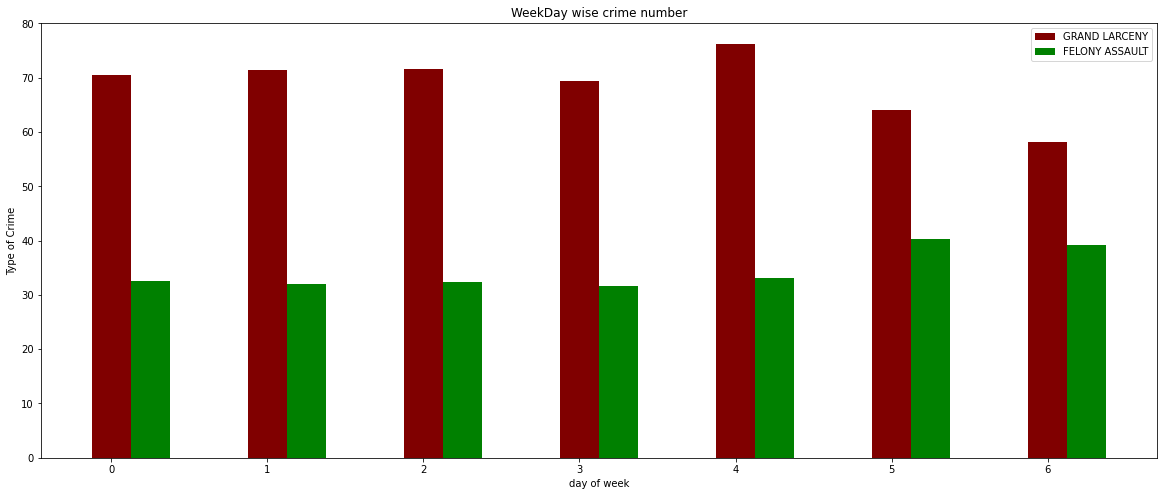

In [34]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively
plt.figure(figsize=(20, 8))
plt.bar(dow_crime_df[dow_crime_df['OFNS_DESC']=='GRAND LARCENY']['day_of_week'],dow_crime_df[dow_crime_df['OFNS_DESC']=='GRAND LARCENY']['normalized_crime_count'], color='maroon', width=0.25, label='GRAND LARCENY')
plt.bar(dow_crime_df[dow_crime_df['OFNS_DESC']=='FELONY ASSAULT']['day_of_week']+0.25,dow_crime_df[dow_crime_df['OFNS_DESC']=='FELONY ASSAULT']['normalized_crime_count'], color='green',width=0.25, label='FELONY ASSAULT')

plt.xlabel("day of week")
plt.ylabel("Type of Crime")
plt.legend()
plt.title("WeekDay wise crime number")

Text(0.5, 1.0, 'Hourly Basis crime number')

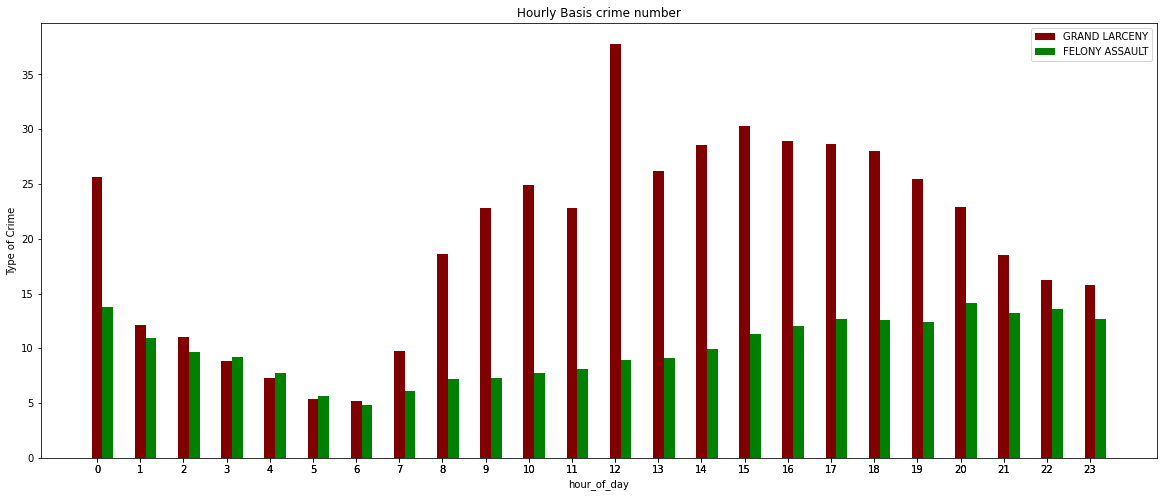

In [35]:
plt.figure(figsize=(20, 8))
plt.bar(hod_crime_df[hod_crime_df['OFNS_DESC']=='GRAND LARCENY']['hour_of_day'],hod_crime_df[hod_crime_df['OFNS_DESC']=='GRAND LARCENY']['normalized_crime_count'], color='maroon', width=0.25, label='GRAND LARCENY')
plt.bar(hod_crime_df[hod_crime_df['OFNS_DESC']=='FELONY ASSAULT']['hour_of_day']+0.25,hod_crime_df[hod_crime_df['OFNS_DESC']=='FELONY ASSAULT']['normalized_crime_count'], color='green',width=0.25, label='FELONY ASSAULT')

plt.xlabel("hour_of_day")
plt.xticks(hod_crime_df.hour_of_day)
plt.ylabel("Type of Crime")
plt.legend()
plt.title("Hourly Basis crime number")

### 5. comparing the %% decomposition of crime within different boroughs

### % distribution of crime types by borough in pie charts 

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

In [36]:
boro_crime_df = data.groupby(['BORO_NM', 'OFNS_DESC'])['CMPLNT_NUM'].nunique().reset_index()
boro_complaint_df = data.groupby(['BORO_NM'])['CMPLNT_NUM'].nunique().reset_index()

In [37]:
data_type1 = boro_complaint_df.merge(boro_crime_df, left_on='BORO_NM', right_on='BORO_NM')

In [38]:
data_type1.head(10)

,BORO_NM,CMPLNT_NUM_x,OFNS_DESC,CMPLNT_NUM_y
0,BRONX,18919,ARSON,211
1,BRONX,18919,BURGLARY,1981
2,BRONX,18919,FELONY ASSAULT,5774
3,BRONX,18919,GRAND LARCENY,5992
4,BRONX,18919,GRAND LARCENY OF MOTOR VEHICLE,1241
5,BRONX,18919,RAPE,302
6,BRONX,18919,ROBBERY,3418
7,BROOKLYN,26290,ARSON,197
8,BROOKLYN,26290,BURGLARY,3522
9,BROOKLYN,26290,FELONY ASSAULT,5926


In [39]:
#CMPLNT_NUM_x- borough wise crimes
#CMPLNT_NUM_y- particular type of crime in that borough
data_type1['percentage_crime']=(data_type1['CMPLNT_NUM_y']/data_type1['CMPLNT_NUM_x'])*100

In [40]:
data_type1.head()

,BORO_NM,CMPLNT_NUM_x,OFNS_DESC,CMPLNT_NUM_y,percentage_crime
0,BRONX,18919,ARSON,211,1.115281
1,BRONX,18919,BURGLARY,1981,10.470955
2,BRONX,18919,FELONY ASSAULT,5774,30.519583
3,BRONX,18919,GRAND LARCENY,5992,31.671864
4,BRONX,18919,GRAND LARCENY OF MOTOR VEHICLE,1241,6.559543


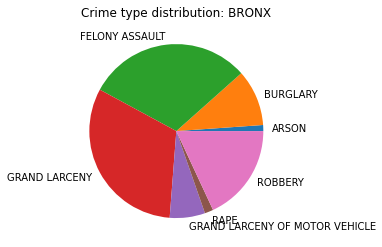

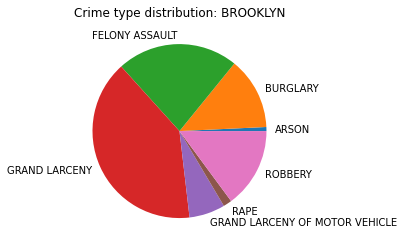

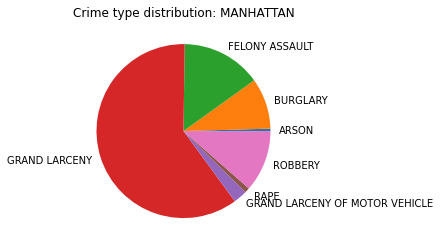

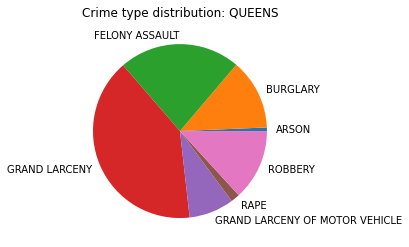

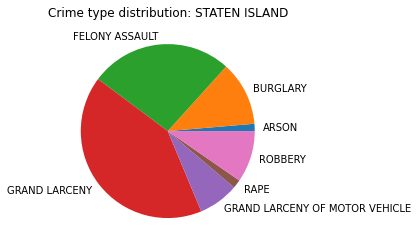

In [41]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

for boro in data_type1.BORO_NM.unique():
    
    # complete this code here
    plt.pie(data_type1[data_type1.BORO_NM==boro]['percentage_crime'], labels=data_type1[data_type1.BORO_NM==boro]['OFNS_DESC'])
    plt.title("Crime type distribution: " + str(boro))
    plt.show()
    

## Section 3 - Hypothesis testing tasks (18 pts, 9 pts for each part)

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [42]:
# type 1 crime data for 2019
data_2019 = data[data['CMPLNT_FR_DT'].dt.year == 2019]
print("Keeping the data for 2019 only: "+str (data_2019.shape))

Keeping the data for 2019 only: (91481, 9)


In [43]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 250.63
Standard deviation = 32.87
1 percentile = 172.64
5 percentile = 197.20
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


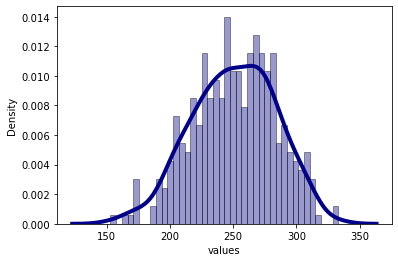

In [44]:
#group the Type1 crime data per day for year 2019
daily2019 = data_2019[['CMPLNT_NUM','CMPLNT_FR_DT']].groupby(by=['CMPLNT_FR_DT']).nunique().reset_index()

# plot the distribution (density plot)
distribution_analysis(daily2019.CMPLNT_NUM, bins=40, vis_means = False)

Mean = 250.63
Standard deviation = 32.87
1 percentile = 172.64
5 percentile = 197.20
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


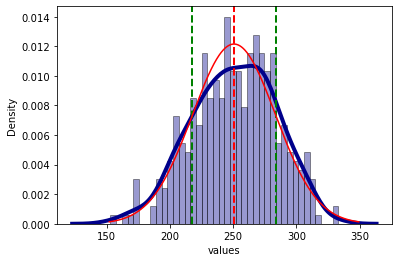

In [45]:
# normality test
#if we now fit the normal distribution:
distribution_analysis(daily2019.CMPLNT_NUM, fit_distribution='normal', bins=40);

**Conclusion** - We can see the distribution somewhat similar to bell curve (normal), but having a wider (double) peak, and some of the points are also extreme and going beyond the curve.

### 2. weekdays vs weekend distribution

In [46]:
data_2019['day_of_week'] = data_2019.CMPLNT_FR_DT.dt.dayofweek
data_2019.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,day_of_week
5,293718737,2019-12-27,22:00:00,BURGLARY,MANHATTAN,NaN,40.720759,-73.980466,POINT (-73.98047 40.72076),4
10,585574881,2019-12-24,16:00:00,GRAND LARCENY,MANHATTAN,NaN,40.750431,-73.989282,POINT (-73.98928 40.75043),1
14,249276017,2019-12-20,14:00:00,FELONY ASSAULT,BRONX,NaN,40.822271,-73.911698,POINT (-73.91170 40.82227),4
16,183266811,2019-12-20,01:35:00,BURGLARY,BROOKLYN,NaN,40.632545,-73.981951,POINT (-73.98195 40.63254),4
18,431547413,2019-12-10,20:06:00,ARSON,MANHATTAN,NaN,40.711952,-73.989855,POINT (-73.98985 40.71195),1


In [47]:
# create dataframes for weekdays and weekends
weekday_2019 = data_2019[data_2019['day_of_week']<=4]
weekend_2019 = data_2019[data_2019['day_of_week']>4]

In [48]:
# group daily numbers for weekdays and normalized by population
daily_weekday_complaints = weekday_2019.groupby(['CMPLNT_FR_DT'])['CMPLNT_NUM'].nunique().reset_index()
daily_weekday_complaints['normalized_complaint_count'] = daily_weekday_complaints['CMPLNT_NUM']/tot_population
# group daily numbers for weekends and normalized by population
daily_weekend_complaints = weekend_2019.groupby(['CMPLNT_FR_DT'])['CMPLNT_NUM'].nunique().reset_index()
daily_weekend_complaints['normalized_complaint_count'] = daily_weekend_complaints['CMPLNT_NUM']/tot_population

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


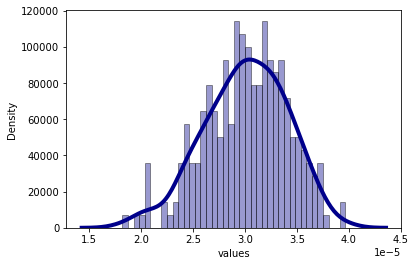

In [49]:
# plot the distribution (density plot)
distribution_analysis(daily_weekday_complaints.normalized_complaint_count, bins=40, vis_means = False)

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


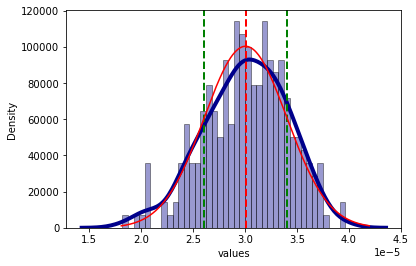

In [50]:
#if we now fit the normal distribution:
distribution_analysis(daily_weekday_complaints.normalized_complaint_count, fit_distribution='normal', bins=40);

Here Also curve almost follows the normal distribution but not completely, its little skewed.

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


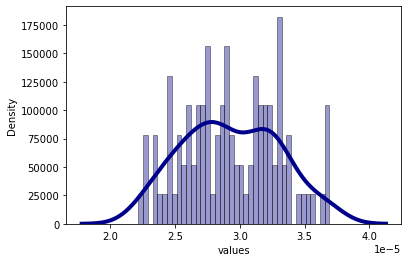

In [51]:
# plot the distribution (density plot)
distribution_analysis(daily_weekend_complaints.normalized_complaint_count, bins=40, vis_means = False)

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


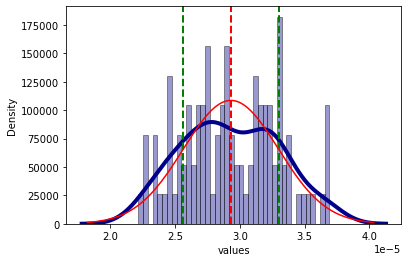

In [52]:
#if we now fit the normal distribution:
distribution_analysis(daily_weekend_complaints.normalized_complaint_count, fit_distribution='normal', bins=40);

The curve is two peaked and also has some extreme values. Curve does not follow the normal distribution curve visually.

## T- Test
### Q: Can you reject either hypothesis at the 10% significance level?

In [53]:
# t-test
stats.ttest_ind(daily_weekday_complaints['CMPLNT_NUM'],daily_weekend_complaints['CMPLNT_NUM'])

Ttest_indResult(statistic=1.6723889005204198, pvalue=0.09530928900408948)

### Answer: p-value is less than 0.10, that means we can reject the null hypothesis with 90% confidence. This shows that its highly unlikely that it has occurred by chance.

## K-S TEST
### Q. Do weekday and weekend daily crime numbers follow the same distribution

In [54]:
# k-s test
stats.ks_2samp(daily_weekday_complaints['CMPLNT_NUM'],daily_weekend_complaints['CMPLNT_NUM'])

KstestResult(statistic=0.14968317123489538, pvalue=0.06303387257522763)

### Answer: p-value is less than 0.10, that means we can reject the null hypothesis with 90% confidence. This shows that weekday and weekend daily crime numbers does not follow the same distribution.